# Анализ продаж для  интернет-магазина «Стримчик» (сборный проект)

##### [Часть 1. Изучение общей информации:](#1-bullet)
* Изученеие файлов с данными, получение общей информации, загрузка библиотек.
* Нахождение и ликвидация пропусков.

##### [Часть 2. Подготовка данных:](#2-bullet)
* Приведение данных к нужным типам.
* Нахождение и исправление аномалий и ошибок.
* Вначале надо обработать пустые значения, привест таблицу в порядок, привести заголовки к нужному регистру, добавить новые столбцы
##### [Часть 3. Анализ данных:](#4-bullet)
* Посмотреть, сколько игр выпускалось в разные годы
* Посмотреть, как менялись продажи по платформам. Определить актуальный период для прогноза
* Посмотреть какие платформы лидируют по продажам, растут они или падают?
* Избавиться от выбросов 
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами
* Соотнести выводы с продажами игр на других платформах.
* Посмотреть на общее распределение игр по жанрам. Определить прибыльные жанры
* Определить для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5)
Самые популярные жанры (топ-5)
Влияние  рейтинга ESRB на продажи в отдельном регионе
##### [Часть 4 Проверка гипотез:](#4-bullet)
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## <a id='1-bullet'></a>  Часть 1. Изучение общей информации:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data = pd.read_csv('/datasets/games.csv')
data = pd.read_csv('C:/Users/Гаяне/Desktop/яндекс практика/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## <a id='2-bullet'></a> Часть 2. Предобработка данных. 
Замена названий столбцов на стандартные, изменение типа данных 

In [5]:
data.columns = map(str.lower, data.columns) #преобразование столбцов к нижнему регистру

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Год реализации (Year_of_Release) должно быть целое число и тип даты, а в данных это float. 
Тип данных в оценке пользователей "объект" надо заменить на числовой формат. 
Оценка по 100 бальной системе должна быть в целых числах, данные после запятой - нули, от них надо избавиться, привести к типу инт 

In [7]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='ignore')

In [8]:
print(data.query('user_score == "tbd"')['user_score'].count())

2424


В столбце с оценкой пользователей есть строковое значение "tbd", их достаточно много. похоже, что речь идет о новых играх, которые пользователи еще не успели оценить. Возможно, эти данные пригодятся для какого-то анализа. Можно создать дополнительный столбец, в котором они будут сохранены, а в самом столбце заменить их на nan, потом решить, что с ними делать.  В дополнительном стобце неизвестные данные будут заменены на медиану по оценке за последний год, поскольку это наиболее близкие данные. 

In [9]:
data['new_user_score'] = data['user_score']
data['new_user_score'] = pd.to_numeric(data['new_user_score'], errors='coerce')
print(data.query('year_of_release == 2016')['new_user_score'].median())


7.0


In [10]:
data.loc[data['user_score'] == "tbd", 'new_user_score'] = 7

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [12]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,new_user_score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,8.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


### Пропуски
* Пропуск в имени. Тут всего 2 пропуска, если не известно название игры, то нет смысла что-то фанатазировать, проще удалить 2 неизвестных значения. На результат это никак не повлияет.
* Пропуски в столбце с годом выпуска. Меньше 300 пропусков.Этот столбец нужен для проверки одной из гипотз, хорошо бы его привести в формат даты. Пропущенные данные сложно привязать к какому-то критерию, можно использовать медиану, которая меньше всего подвержена выбросам и которая не повлияет на результат исследования. 
* Пропуск в оценке критиков. Может быть связано с тем, что игра слишком старая или наоборот только вышла, ее практически нет в продаже и нет соотеветсвенно нет оценок. В реальном проекте я бы не стала эти данные трогать, а предпочла бы работать с меньшим количеством данных, но точно известых, поскольку для слишком большого количества неизвестных приходится фантазировать. Но в учебном проекте наверное лучше что-то нафантазировать. Например, предположить, что рейтинг зависит от жанра, и заполнить пустые значения по медиане данных, сгруппированных по жанрам. На результат исследования это не должно повлиять, поскольку медиана меньше всего подвержена выбросам. Если жанры мало внияют на оценки, то это не отразится на результате, если влияют - то мы это учли. Можно было бы привязать рейтинг с продажами (категоризировать продажи на маленькие, большие, средние), но если верна гипотеза, что это старые или очень новые игры, то рейтинга нет просто потому что игры нет в продаже, а так она была бы такой же популярной, как другие этого же типа, а мы это не учтем. 
* Пропуски в оценке пользователей. Та же причина, что и в первом случае. Но здесь чуть меньше пустых значений, это может быть связано с тем, что пользователи могут оценить даже старые игры, тогда как критики не будут тратить на это время. Пользователи могли купить игры раньше, чем критики успели обратить на них внимание. Заполнять пропуски можно как и в предыдущем случае
* Пропуски в возрастном рейтинге. В новых или старых играх возрастные ограничения могли быть не проставлены. Заполнять эти значения стоит после определения актуального периода, поскольку возрастыне ограничения менялись со временем. Это я сделаю в соотвествующем разделе перед анализом этого показателя.  

In [13]:
# Удаление строк, которых нет в колонке с именем. 
data= data.dropna(subset=['name'])

In [14]:
null_data = data['year_of_release'].isna()
data.query('year_of_release == @null_data and new_user_score == 11')['year_of_release'].sum()

0.0

In [15]:

print(data['year_of_release'].median())
data['year_of_release'] = data['year_of_release'].fillna(2007)

2007.0


In [16]:
data['year_of_release'].isna().sum()

0

In [17]:
# заполнение пропуском в рейтинге пользователей и критиков
medians = data.groupby(['genre']).agg({'user_score': 'median', 'critic_score': 'median'}).rename(columns = {'user_score':'medians_user_score', 'critic_score': 'medians_critic_score'})
new_data = data.merge(medians, on = ['genre'])
new_data['new_user_score'] = new_data['new_user_score'].fillna(new_data['medians_user_score'])
new_data['user_score'] = new_data['user_score'].fillna(new_data['medians_user_score'])
new_data['critic_score'] = new_data['critic_score'].fillna(new_data['medians_critic_score'])

In [18]:
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,new_user_score,medians_user_score,medians_critic_score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,8.0,7.4,75.0
1,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0,7.4,75.0
2,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,7.7,7.4,75.0
3,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,7.4,7.4,75.0
4,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,4.3,7.4,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Codename: Panzers Complete Collection,PC,2016.0,Strategy,0.00,0.01,0.00,0.00,73.0,7.8,NaN,7.8,7.8,73.0
16709,Hospital Tycoon,PC,2007.0,Strategy,0.00,0.01,0.00,0.00,51.0,3.8,E10+,3.8,7.8,73.0
16710,End of Nations,PC,2012.0,Strategy,0.01,0.00,0.00,0.00,73.0,7.8,T,7.8,7.8,73.0
16711,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,73.0,8.1,K-A,8.1,7.8,73.0


In [19]:
#Изменение формата даты

new_data['year_of_release'] = new_data['year_of_release'].astype('int')


In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  16713 non-null  object 
 1   platform              16713 non-null  object 
 2   year_of_release       16713 non-null  int32  
 3   genre                 16713 non-null  object 
 4   na_sales              16713 non-null  float64
 5   eu_sales              16713 non-null  float64
 6   jp_sales              16713 non-null  float64
 7   other_sales           16713 non-null  float64
 8   critic_score          16713 non-null  float64
 9   user_score            16713 non-null  float64
 10  rating                9949 non-null   object 
 11  new_user_score        16713 non-null  float64
 12  medians_user_score    16713 non-null  float64
 13  medians_critic_score  16713 non-null  float64
dtypes: float64(9), int32(1), object(4)
memory usage: 1.8+ MB


In [21]:
#добавление столбца с суммой продаж по всем регионам
new_data['sum_sales'] = new_data['na_sales'] + new_data['eu_sales'] + new_data['jp_sales'] + new_data['other_sales']
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,new_user_score,medians_user_score,medians_critic_score,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,8.0,7.4,75.0,82.54
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0,7.4,75.0,32.77
2,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,7.7,7.4,75.0,22.70
3,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,7.4,7.4,75.0,21.80
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,4.3,7.4,75.0,8.58


## Вывод по обработке данных
Данные годовы к дальнейней работе с ними. Типы данныз изменены на необходимые. Пропуски заполнены. Добавлены необходимые столбцы

## <a id='3-bullet'></a> Часть 3. Исследовательский анализ
Анализ популярных игр, платформ, определение актуального периода и популярных платформ.

Text(0, 0.5, 'Количество игр')

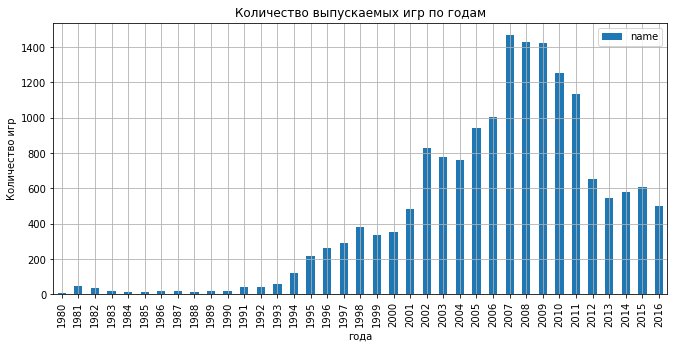

In [22]:
new_data_count = new_data.groupby('year_of_release').agg({'name': 'count'}).plot(grid=True, kind ='bar', figsize=(11, 5))
plt.title("Количество выпускаемых игр по годам")
plt.xlabel("года")
plt.ylabel("Количество игр")


С 1980 по 1993 выпускалось очень мало игр. Пик выпусков был в 2007, затем следует спад и небольшой подъем в 2015. На 2016 год может нет всех данных, поэтому нельзя делать вывод, какая тенденция. Поскольку наша задача дать прогноз, то следует учитывать только новые игры, поскольку данные по старым уже не так актуальны. Начинать можно с 2007г, когда было больше всего выпусков игр 

Text(0, 0.5, 'Платформы')

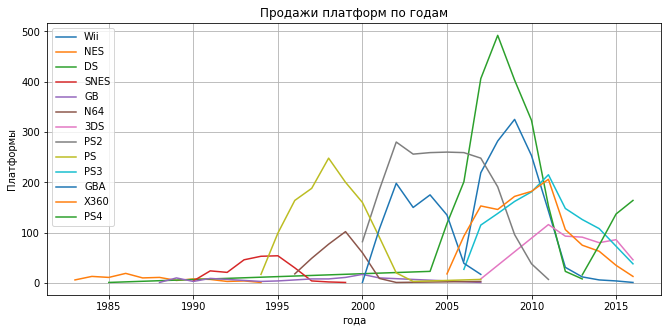

In [23]:
platforms = new_data.query('sum_sales > 10')['platform'].unique()
all_games = []

for platform in platforms:
    all_games.append(new_data.groupby('platform').get_group(platform).groupby('year_of_release').agg({'name': 'count'}).rename(
        columns={'name':platform}))

ax = all_games[0].plot(grid=True, figsize=(11, 5))

for game in all_games[1:]:
    game.plot(ax=ax,grid=True, figsize=(11, 5))
plt.title("Продажи платформ по годам")
plt.xlabel("года")
plt.ylabel("Платформы")

На графике видно, что средний срок жини платформы от 5 до 10 лет. Так что следует считать актуальный период с 2014 года, с периода, когда появились две самые перспективные платформы. 

In [24]:
new_data2017 = new_data.query('year_of_release >= 2014')

Text(0, 0.5, 'Платформы')

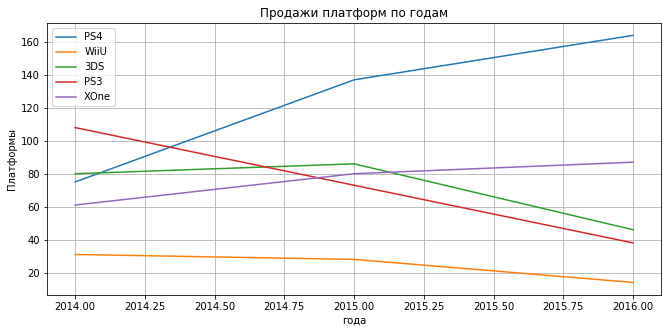

In [25]:
platforms = new_data2017.query('sum_sales > 5')['platform'].unique()
all_games = []
for platform in platforms:
    all_games.append(new_data2017.groupby('platform').get_group(platform).groupby('year_of_release').agg({'name': 'count'}).rename(
        columns={'name':platform}))

ax = all_games[0].plot(grid=True, figsize=(11, 5))

for game in all_games[1:]:
    game.plot(ax=ax,grid=True, figsize=(11, 5))
plt.title("Продажи платформ по годам")
plt.xlabel("года")
plt.ylabel("Платформы")

Text(0.5, 1.0, 'Сумма продаж по платформам')

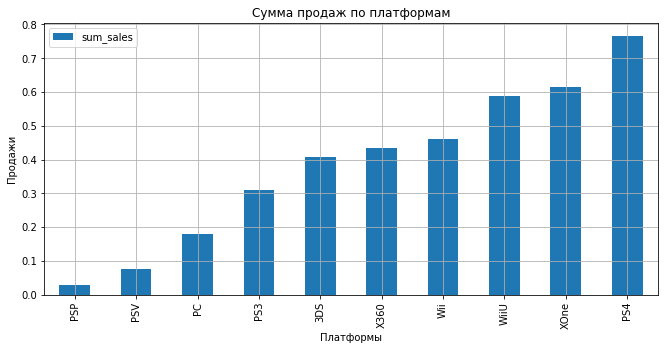

In [26]:
new_data2017.pivot_table(index = 'platform', values = 'sum_sales').sort_values(by='sum_sales').plot(grid=True, kind= 'bar', figsize=(11, 5))
plt.xlabel("Платформы")
plt.ylabel("Продажи")
plt.title("Сумма продаж по платформам")


Из тех, кто выжил до 2016г. самые популярные платформы PS(3-4), X360, 3DS, Wii, XOne, WiiU. Из всех платформ на взлете только Плейстешн 4 и XOne. Остальные платформы на спаде.


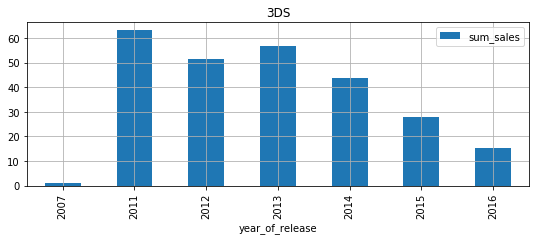

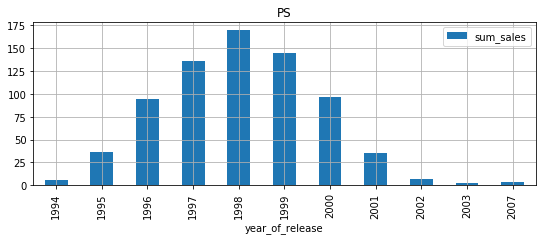

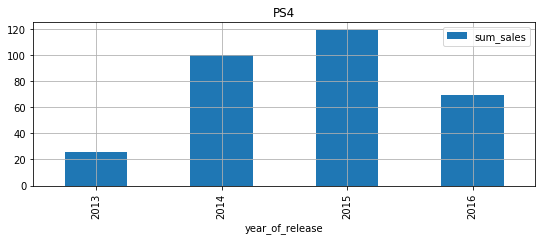

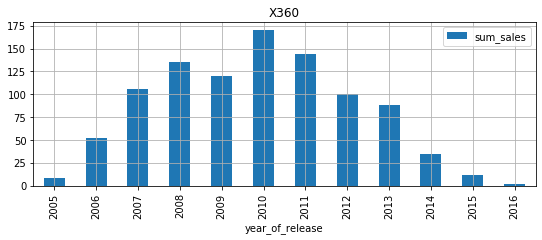

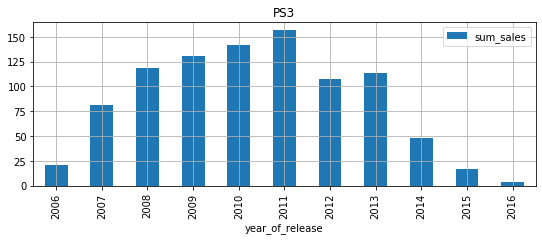

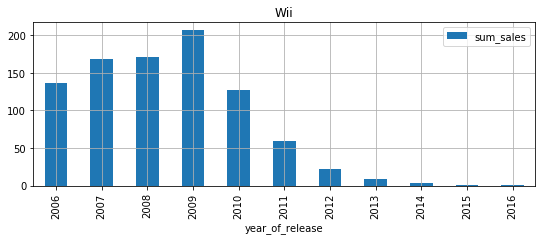

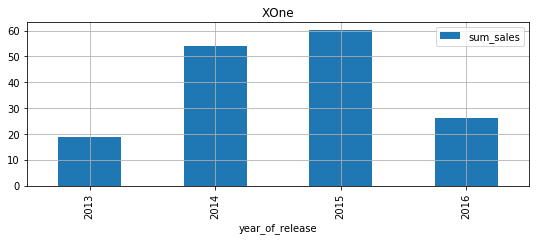

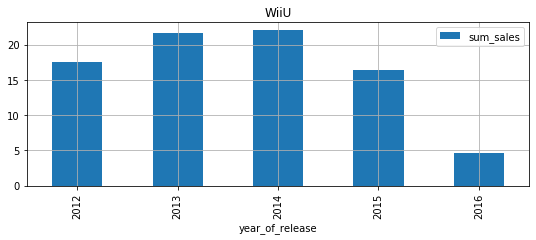

In [27]:
new_data.query('platform == "3DS"').groupby('year_of_release').agg({'sum_sales': 'sum'}).plot(grid=True, kind='bar', figsize=(9, 3))
plt.title("3DS")
new_data.query('platform == "PS"').groupby('year_of_release').agg({'sum_sales': 'sum'}).plot(grid=True, kind='bar', figsize=(9, 3))
plt.title("PS")
new_data.query('platform == "PS4"').groupby('year_of_release').agg({'sum_sales': 'sum'}).plot(grid=True, kind='bar', figsize=(9, 3))
plt.title("PS4")
new_data.query('platform == "X360"').groupby('year_of_release').agg({'sum_sales': 'sum'}).plot(grid=True, kind= 'bar', figsize=(9, 3))
plt.title("X360")
new_data.query('platform == "PS3"').groupby('year_of_release').agg({'sum_sales': 'sum'}).plot(grid=True, kind= 'bar', figsize=(9, 3))
plt.title("PS3")
new_data.query('platform == "Wii"').groupby('year_of_release').agg({'sum_sales': 'sum'}).plot(grid=True, kind= 'bar', figsize=(9, 3))
plt.title("Wii")
new_data.query('platform == "XOne"').groupby('year_of_release').agg({'sum_sales': 'sum'}).plot(grid=True, kind= 'bar', figsize=(9, 3))
plt.title("XOne")
new_data.query('platform == "WiiU"').groupby('year_of_release').agg({'sum_sales': 'sum'}).plot(grid=True, kind= 'bar', figsize=(9, 3))
plt.title("WiiU")
plt.show()

### Вывод
Похоже, что платформы в среднем живут от 5 до 10 лет, идет сначала подъем и постепенное умирание. Чем дальше, тем быстрее меняются платформы. У PS3 был пик популярности в 2011, а в 2013 появляется PS4 и к 2015г. вытесняет PS3. Самые перспективные это PS4(на взлете), PS, XOne, 3DS, X360, WiiU. Последниде две уже прошла пик популярности и идет на спад. Данные за 2016г. неполные, поэтому сложно сказать, какая сейчас ситуация с продажами.
Актуальным для прогноза на 2017г. периодом можно считать 5 лет.

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

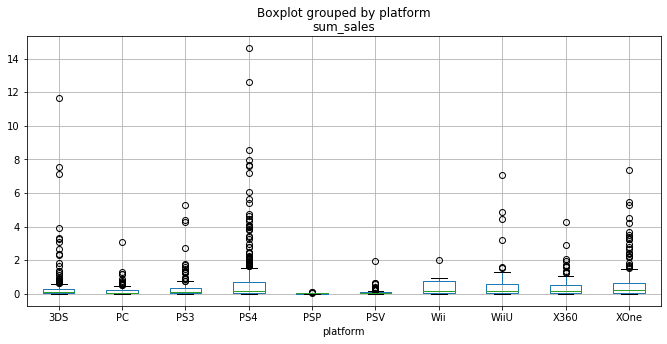

In [28]:
new_data2017.boxplot('sum_sales', 'platform', figsize=(11, 5));


Самое большое среднее у PS3-4, X360, XOne. Похоже, это самые популярные в мире платформы, в данных есть длинный хвост в районе 2,5, после 5 значения совсем редкие, при анализе надо будет отбросить. 

In [29]:
# Для интереса, показать, что я так тоже умею
new_data2017.query('platform == "PS4"')['sum_sales'].describe()
#Можно было бы еще точнее посчитать правилу трех сигм, где лежит большинство данных для PS4
3 * 1.6 + 0.8

5.6000000000000005

#### Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [30]:
print('Корреляция продаж PS4 и отзывов по коэффициенту Пирсона:', 
      new_data2017.query('platform == "PS4" and sum_sales < 2.5')['new_user_score'].corr(new_data2017['sum_sales']))
print('Корреляция продаж PS4  и отзывов по коэффициенту Пирсона без учета tbd:',
      new_data2017.query('platform == "PS4" and sum_sales < 2.5')['user_score'].corr(new_data2017['sum_sales']))
print('Корреляция продаж PS4 и отзывов критиков по коэффициенту Пирсона:', 
      new_data2017.query('platform == "PS4" and sum_sales < 2.5')['critic_score'].corr(new_data2017['sum_sales']))

Корреляция продаж PS4 и отзывов по коэффициенту Пирсона: -0.04864388217347433
Корреляция продаж PS4  и отзывов по коэффициенту Пирсона без учета tbd: -0.05149697000546347
Корреляция продаж PS4 и отзывов критиков по коэффициенту Пирсона: 0.30093215264045853


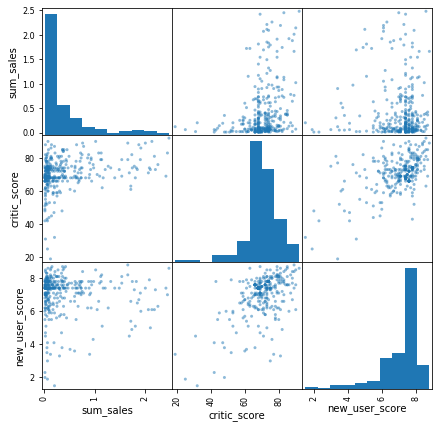

In [31]:
matrix_data = new_data2017.query('platform == "PS4" and sum_sales < 2.5')[['sum_sales','critic_score','new_user_score']]
pd.plotting.scatter_matrix(matrix_data, figsize=(7, 7));

In [32]:
print('Корреляция продаж остальных платформ и отзывов по коэффициенту Пирсона:', 
      new_data2017.query('platform != "PS4" and sum_sales <= 2.5')['new_user_score'].corr(new_data2017['sum_sales']))
print('Корреляция продаж остальных платформ и отзывов по коэффициенту Пирсона без учета tbd:',
      new_data2017.query('platform != "PS4" and sum_sales <= 2.5')['user_score'].corr(new_data2017['sum_sales']))
print('Корреляция продаж остальных платформ и отзывов критиков по коэффициенту Пирсона:', 
      new_data2017.query('platform != "PS4" and sum_sales <= 2.5')['critic_score'].corr(new_data2017['sum_sales']))

Корреляция продаж остальных платформ и отзывов по коэффициенту Пирсона: -0.11069524500083272
Корреляция продаж остальных платформ и отзывов по коэффициенту Пирсона без учета tbd: -0.11941124367655874
Корреляция продаж остальных платформ и отзывов критиков по коэффициенту Пирсона: 0.2988375393922884


#### Вывод
По одной из самых популярных платформ больше всего связь между отзывами критиков и продажами, в меньшей степени связь между отзывами пользователей и продажами. Для остальных платформ корреляция между отзывами критиков и продажами чуууть меньше, чем для самой популярной платформы, можно сказать, что разница не существена.  

А вот на других платформах корреляция между продажами и отзывами пользователей заметно больше, чем в случае с самой популярной платформой. Влияние критиков на продажи точно такое же. 

#### Общее распределение игр по жанрам. 


In [33]:
new_data2017.groupby(['genre']).agg({'sum_sales':'sum'}).sort_values(by = 'sum_sales', ascending=False)

,sum_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


#### Вывод
Самый прибыльные жанры Action и Shooter, с большим отрывом от них идут  Role-Playing и Sports. На жанр Puzzle лучше вообще не рассчитывать 

##  Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [34]:
new_data2017.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,new_user_score,medians_user_score,medians_critic_score,sum_sales
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,4.3,7.4,75.0,8.58
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,5.0,7.4,75.0,7.60
11,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,5.7,7.4,75.0,6.08
23,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,75.0,4.5,E,4.5,7.4,75.0,4.28
33,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,6.7,7.4,75.0,3.87


In [35]:
top5_platform = new_data2017.groupby('platform').agg({'eu_sales': 'sum', 'jp_sales': 'sum', 'na_sales': 'sum', 'other_sales': 'sum'})

In [36]:
jp_part_sales = (top5_platform['jp_sales'] / top5_platform['jp_sales'].sum()).sort_values(ascending=False).head()
eu_part_sales = (top5_platform['eu_sales'] / top5_platform['eu_sales'].sum()).sort_values(ascending=False).head()
na_part_sales = (top5_platform['na_sales'] / top5_platform['na_sales'].sum()).sort_values(ascending=False).head()
other_part_sales = (top5_platform['other_sales'] / top5_platform['other_sales'].sum()).sort_values(ascending=False).head()
print('Топ 5 доля высокий продаж в Японии по платформам', jp_part_sales);
print('Топ 5 доля высокий продаж в Европе по платформам', eu_part_sales)
print('Топ 5 доля высокий продаж в Америке по платформам', na_part_sales);
print('Топ 5 доля высокий продаж в других странах по платформам',other_part_sales);

Топ 5 доля высокий продаж в Японии по платформам platform
3DS     0.475239
PS4     0.161349
PSV     0.156193
PS3     0.120529
WiiU    0.078526
Name: jp_sales, dtype: float64
Топ 5 доля высокий продаж в Европе по платформам platform
PS4     0.480420
XOne    0.170866
PS3     0.094355
PC      0.066388
3DS     0.059554
Name: eu_sales, dtype: float64
Топ 5 доля высокий продаж в Америке по платформам platform
PS4     0.347145
XOne    0.286102
X360    0.099627
3DS     0.079701
PS3     0.077624
Name: na_sales, dtype: float64
Топ 5 доля высокий продаж в других странах по платформам platform
PS4     0.544964
XOne    0.153394
PS3     0.114800
X360    0.053296
3DS     0.045087
Name: other_sales, dtype: float64


Text(0.5, 1.0, 'Доля в Японии')

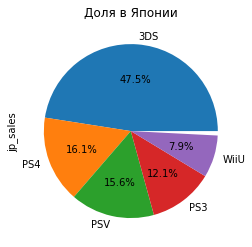

In [37]:
jp_part_sales.plot(kind='pie', autopct='%1.1f%%');
plt.title("Доля в Японии")

Text(0.5, 1.0, 'Доля в Европе')

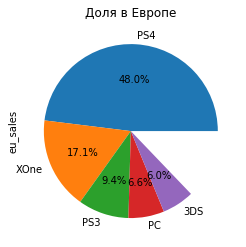

In [38]:
eu_part_sales.plot(kind='pie', autopct='%1.1f%%');
plt.title("Доля в Европе")

Text(0.5, 1.0, 'Доля в Америке')

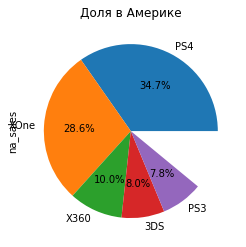

In [39]:
na_part_sales.plot(kind='pie', autopct='%1.1f%%');
plt.title("Доля в Америке")

Text(0.5, 1.0, 'Доля в других странах')

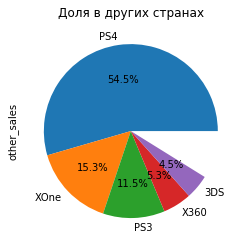

In [40]:
other_part_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Доля в других странах")

#### Вывод по топу
* Самые популярные в Европе платформы  это PS3 (доля от общих продаж в Европе 0.2), PS4 (доля 0.2), X360 (доля 0.17), 3DS (доля   0.09), PS4   (доля 0.06) 
* Для Японии самые популярные платформы 3DS  (доля от общих продаж в Японии  0.4), PS3 (доля 0.2),  с большим отрывом PSP (доля 0.09), PSV (доля 0.08) и PS4 (доля  0.06)
* В Америке самые популярные платформы X360 (доля 0.27), PS3 (доля 0.2),  PS4 (доля 0.13), XOne (доля 0.11), 3DS (доля 0.09) 
* Самые популярные платформы в других странах PS3 (доля 0.3), PS4 (доля 0.2), X360 (доля 0.15), XOne (доля 0.06), 3DS (0.06)
Похоже, что в разные областях популярны разные платформы, больше всего отличается Япония, которая предпочтает две основные платформы, а остальные пользуются гораздо меньшим спросом. Рынок у разных регионов тоже отличается,  так что для прогноза нужно учитывать, что в Японии не самые большие продажи в принципе

### Самые популярные жанры (топ-5)

In [41]:
top5_genre= new_data2017.groupby('genre').agg({'eu_sales': 'sum', 'jp_sales': 'sum', 'na_sales': 'sum', 'other_sales': 'sum'})
top5_genre.sort_values(by='eu_sales', ascending = False).head()

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,74.68,29.58,72.53,22.57
Shooter,65.52,4.87,79.02,21.53
Sports,45.73,3.26,46.13,14.36
Role-Playing,28.17,31.16,33.47,8.64
Racing,14.13,1.76,8.74,2.89


In [42]:
top5_genre.sort_values(by='jp_sales', ascending = False).head()

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Role-Playing,28.17,31.16,33.47,8.64
Action,74.68,29.58,72.53,22.57
Fighting,6.69,6.37,12.43,2.73
Misc,12.86,5.61,15.05,4.03
Shooter,65.52,4.87,79.02,21.53


In [43]:
top5_genre.sort_values(by='na_sales', ascending = False).head()

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Shooter,65.52,4.87,79.02,21.53
Action,74.68,29.58,72.53,22.57
Sports,45.73,3.26,46.13,14.36
Role-Playing,28.17,31.16,33.47,8.64
Misc,12.86,5.61,15.05,4.03


In [44]:
top5_genre.sort_values(by='na_sales', ascending = False).head()

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Shooter,65.52,4.87,79.02,21.53
Action,74.68,29.58,72.53,22.57
Sports,45.73,3.26,46.13,14.36
Role-Playing,28.17,31.16,33.47,8.64
Misc,12.86,5.61,15.05,4.03


* В Европе предпочитают экшн, вслед за ним стрелялки, потом спортивный жанр, ролевые игры и  Racing
* В Японии самые популярные ролевые игры, на втором месте экшн, потом Misc и стрелялки
* В Америке и остальных странах самый популярный жанр экшн, вслед за ним стрелялки, потом спорт, ролевые игры и Misc

Похоже, что в жанровых предпочтениях Япония тоже сильно выделяется. Европа отличается от остального мира только в последнем пункте топа. 


### Влияние рейтинга ESRB на продажи в отдельном регионе

In [45]:
new_data2017['rating'].unique()

array(['E', 'E10+', 'T', nan, 'M'], dtype=object)

#### Предобработка
Пропуски в рейтингах заменяем на "unknown"  

In [46]:
new_data2017.loc[new_data2017['rating'].isna(), 'rating'] = "unknown"

### Ответ на вопрос

In [47]:
new_data2017.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
unknown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


In [48]:
new_data2017.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,93.44
unknown,58.95
E,58.06
T,34.07
E10+,26.16


In [49]:
new_data2017.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,96.42
unknown,64.72
E,50.74
T,38.95
E10+,33.23


In [50]:
new_data2017.groupby('rating').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False)

,other_sales
rating,
M,28.67
unknown,18.40
E,15.39
T,11.33
E10+,7.83


### Вывод
* В во всем мире кроме Японии самые популярные игры для взрослых, затем большая доля игр, в которых нет рейтинга, на третьем месте игры для детей, потом игры для тинейджеров. В Японии  большая часть игр это игры с неопределенными возрастными ограничениями, на втором месте игры для подростков, на втором месте для подростков и на третьем - для детей. Игры 10+ во всех странах на последнем месте 

In [51]:
# код ревьювера
new_data2017.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,96.42
unknown,64.72
E,50.74
T,38.95
E10+,33.23


## <a id='4-bullet'></a>  Часть 4. Проверьте гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для проверки гипотезу лучше всего подходит т-тест для двух совокупностей, поскольку у нас много данных (больше 30:)) и две совокупности, которые нужно сравнить. Нулевая гипотеза в том, что две совокупности равны. То есть, что нет разницы между Xbox и PC. В случае второй гипотезы, что пользователи одинаково оценивают два жанра игры - спорт и экшн.  Если эта гипотеза не верна, то принимаем альтернативную - что они не равны, что есть разница в пользовательских оценках. Значение для альфа выбираем стандартное 0.05. Перед анализом надо посчитать дисперсию, если она сильно отличается в данных, то установим equal_var = False. 

In [52]:
xbox = new_data2017.query('platform=="XOne"')['new_user_score']
pc = new_data2017.query('platform=="PC"')['new_user_score']


In [53]:

variance_estimate = np.var(xbox, ddof=1)
print('Дисперсия xbox', variance_estimate)
variance_estimate = np.var(pc, ddof=1)
print('Дисперсия xbox', variance_estimate)

Дисперсия xbox 1.50371184017312
Дисперсия xbox 2.540792052980131


In [54]:
from scipy import stats as st
import numpy as np
alpha = .05 

results = st.ttest_ind(xbox, pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.04923676023586829
Отвергаем нулевую гипотезу


In [55]:
action = new_data2017.query('genre=="Action"')['new_user_score']
sports = new_data2017.query('genre=="Sports"')['new_user_score']

In [56]:
variance_estimate = np.var(action, ddof=1)
print('Дисперсия xbox', variance_estimate)
variance_estimate = np.var(sports, ddof=1)
print('Дисперсия xbox', variance_estimate)

Дисперсия xbox 1.005308750411719
Дисперсия xbox 3.4309223602484513


In [57]:
alpha = .05 

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.111124290417822e-17
Отвергаем нулевую гипотезу


### Вывод
* Нам не удалось доказать, что есть какая-то разница между средними отзывами пользователей на Плейстешн и Xbox
* А вот жанры пользователи оценивают по-разному. Экшн круче! 

# Вывод
* Данные обработаны. заполнены пропуски там, где это было возможно. Добавлены нужные столбцы
* С 1980 по 1993 выпускалось очень мало игр. Пик выпусков был в 2007, затем следует спад и небольшой подъем в 2015. На 2016 год может нет всех данных, поэтому нельзя делать вывод, какая тенденция. Поскольку наша задача дать прогноз, то следует учитывать только новые игры, поскольку данные по старым уже не так актуальны. Средний срок жизни платформ от 5 до 10 лет. Для прогноза на 2017г. актуальным периодом можно считать последние 5 лет.
* Из тех, кто выжил до 2016г. самые популярные платформы PS(3-4), X360, 3DS, Wii, XOne, WiiU. Из всех платформ на взлете только Плейстешн 4 и XOne. Остальные платформы на спаде. 
* Самое большое среднее у PS3-4, X360, XOne. Похоже, это самые популярные в мире платформы, в данных был длинный хвост в районе 2,5, которые удалили, чтобы не мешали выбросы при анализе
* По одной из самых популярных платформ (PS4) больше всего связь между отзывами критиков и продажами, в меньшей степени связь между отзывами пользователей и продажами. Для остальных платформ корреляция между отзывами критиков и продажами чуууть меньше, чем для самой популярной платформы, можно сказать, что разница не существена. 
* Самый прибыльные жанры Action и Shooter, с большим отрывом от них идут Role-Playing и Sports. На жанр Puzzle лучше вообще не рассчитывать
* Разные регионы предпочитают разные платформы. Больше всего отличается Япония. Самые популярные в Европе платформы это PS3 (доля от общих продаж в Европе 0.2), PS4 (доля 0.2), X360 (доля 0.17), 3DS (доля 0.09), PS4 (доля 0.06) Для Японии самые популярные платформы 3DS (доля от общих продаж в Японии 0.4), PS3 (доля 0.2), с большим отрывом PSP (доля 0.09), PSV (доля 0.08) и PS4 (доля 0.06). В Америке самые популярные платформы X360 (доля 0.27), PS3 (доля 0.2), PS4 (доля 0.13), XOne (доля 0.11), 3DS (доля 0.09).Самые популярные платформы в других странах PS3 (доля 0.3), PS4 (доля 0.2), X360 (доля 0.15), XOne (доля 0.06), 3DS (0.06) 
* Отличия в жанрововых предпочтениях есть только у Японии. Остальные страны сходятся на том, больше всего предпочитают экшн, вслед за ним стрелялки, потом спортивный жанр, ролевые игры и Racing/Misc. А в Японии самые популярные ролевые игры, на втором месте экшн, потом Misc и стрелялки.
*  В во всем мире кроме Японии самые популярные игры для взрослых, затем большая доля игр, в которых нет рейтинга, на третьем месте игры для детей, потом игры для тинейджеров. В Японии  большая часть игр это игры с неопределенными возрастными ограничениями, на втором месте игры для подростков, на втором месте для подростков и на третьем - для детей. 
* Проверка гипотезы не выявила разницы между оценками пользователей платформ PC и XOne
* А вот в оценках пользователей жанров есть разница. Экшн больше ценится